<a href="https://colab.research.google.com/github/fintechutcc/mof-training/blob/main/mof-training-04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# การลดมิติของข้อมูล (Dimensionality Reduction)

กลไกในการสกัดคุณลักษณะ (Feature Extraction) ของข้อมูล คือ การแปลงข้อมูลให้อยู่ในโดเมนใหม่ ซึ่งเมื่อพิจารณาถึงการลดมิติของข้อมูล การสกัดคุณลักษณะอาจหมายถึงการบีบอัดข้อมูล เพื่อให้ได้เฉพาะข้อมูลที่มีความสำคัญ ในทางปฏิบัติแล้ว การสกัดคุณลักษณะนอกจากจะช่วยลดพื้นที่ที่ใช้ในการจัดเก็บข้อมูล หรือทำให้การเรียนรู้มีประสิทธิภาพดีขึ้นแล้ว ยังทำให้ประสิทธิภาพของการทำนายดีขึ้นโดยการลด Curse of Dimensionality โดยเฉพาะเมื่อใช้แบบจำลองที่ไม่ผ่านการควบคุม (Non-Regularized Models)

## Principle Component Analysis (PCA)

PCA เป็นเทคนิคการแปลงข้อมูลเชิงเส้นแบบไม่มีการสอน (Unsupervised Linear Tranformation) สามารถนำมาประยุกต์ใช้กับการสกัดคุณลักษณะ การลดมิติของข้อมูล และการลดสัญญารบกวนในการประมวลผลสัญญาณเสียง เป็นต้น

ขั้นตอน PCA มีดังนี้


1.   ทำ Standardization บนชุดข้อมูล d คอลัมน์
2.   คำนวณ Covariance Matrix
3.   คำนวณ Eigenvalues และ Eigenvectors จาก Covariance Matrix
4.   จัดเรียงค่า Eigenvector ตามค่า Eigenvalues จากมากไปน้อย
5.   เลือก Eigenvectors จำนวน k ตัวแรก โดย k <= d
6.   สร้าง W (Projection Matrix) จาก k Eigenvectors
7.   แปลงชุดข้อมูลที่มี d คอลัมน์ให้เป็นชุดข้อมูลใหม่ที่มี k คอลัมน์โดยใช้ W



## ตัวอย่าง

โหลดข้อมูล wine ซึ่งมีทั้งสิ้น 14 คอลัมน์ โดยที่คอลัมน์ 0 เป็น target ส่วนคอลัมน์ 1 - 13 เป็นคุณลักษณะ (d = 13)

In [1]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('/content/drive/My Drive/data/ML/wine.data',  header=None)
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### ขั้นตอนที่ 1: Standardization
X คือ คอลัมน์ 1 ถึงคอลัมน์สุดท้าย

y คือ คอลัมน์ 0

In [2]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=2020)

# standardize the features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

### ขั้นตอนที่ 2-3: คำนวณ Covariance Matrix และ Eigenvalues/Eigenvectors

In [3]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues:\n%s' % eigen_vals)

Eigenvalues:
[4.5790743  2.46113225 1.54324502 0.99885222 0.88863091 0.69891996
 0.5858209  0.33650213 0.32100872 0.10396638 0.15683912 0.22904043
 0.20265872]


### ขั้นตอนที่ 4: จัดเรียงค่า Eigenvector ตามค่า Eigenvalues จากมากไปน้อย

In [4]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

### ขั้นตอนที่ 5: เลือก Eigenvectors จำนวน k ตัวแรก โดย k <= d

จากกราฟด้านล่างนี้ เห็นได้ว่าความสำคัญของ Principle Component Index 1 และ 2 รวมกันแล้วประมาณเกือบ 60% ของคุณลักษณะทั้งหมด เพื่อให้ง่ายต่อการพล็อตในขั้นตอนต่อไป จึงเลือก k=2 

ในทางปฏิบัติ อาจจำเป็นเลือกจำนวน k ที่มากกว่านี้ เพื่อให้ครอบคลุมคุณลักษณะส่วนใหญ่

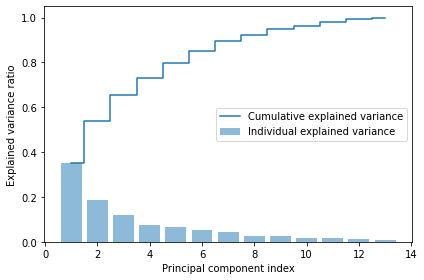

In [5]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
           sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### ขั้นตอนที่ 6: สร้าง W (Projection Matrix) จาก k Eigenvectors

กรณีตัวอย่างนี้ ให้ k=2 

In [6]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13380668  0.47979338]
 [ 0.2382062   0.22204778]
 [-0.01564323  0.34105996]
 [ 0.24010471  0.02277107]
 [-0.10866237  0.32277034]
 [-0.3998582   0.06458716]
 [-0.43061879  0.01843235]
 [ 0.27102104  0.05636037]
 [-0.30946869  0.09793848]
 [ 0.11596917  0.5157007 ]
 [-0.31843441 -0.25635071]
 [-0.38945095 -0.13575563]
 [-0.27310679  0.36345536]]


### ขั้นตอนที่ 7: แปลงชุดข้อมูลที่มี d คอลัมน์ให้เป็นชุดข้อมูลใหม่ที่มี k คอลัมน์โดยใช้ W

ทำได้โดยนำ X_Train_std dot w

In [7]:
X_train_pca = X_train_std.dot(w)

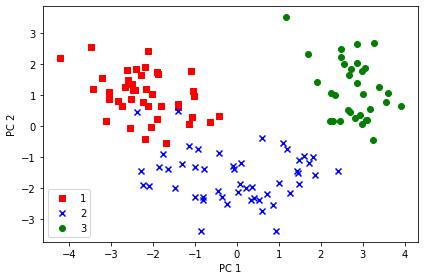

In [8]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


In [9]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)


## PCA โดยใช้ sklearn APIs

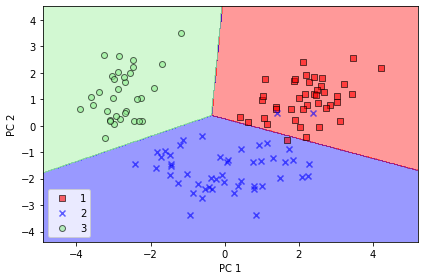

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# initializing the PCA transformer and
# logistic regression estimator:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr',
                        random_state=2020,
                        solver='lbfgs')
# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### Note

เราสามารถสร้าง PCA ที่กำหนดค่าเริ่มต้น n_components=None ได้ เมื่อเรียกใช้ฟังก์ชัน fit_transform ทำ PCA คำนวณ

In [11]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.34939587, 0.18779111, 0.11775381, 0.07621515, 0.06780496,
       0.0533295 , 0.04469973, 0.02567603, 0.02449384, 0.01747641,
       0.01546341, 0.01196725, 0.00793292])